<a href="https://colab.research.google.com/github/NourShehab/nlp-project/blob/main/NLP_MS3_Yarab_el_wa7ed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # For vector operations
import pandas as pd #To handle the dataframe
import matplotlib.pyplot as plt # To display/plot the results and analysis
import re #regular expression to help clean the text
import random
import seaborn as sns

# Importing all classical models from SKlearn which contains all the models predefined
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import sklearn.metrics

import nltk

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/MyDrive/NLP/data/spotify_songs.csv")

Mounted at /content/drive


In [3]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


Data Preperation and Cleaning

In [4]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [6]:
df.describe(include='all')

,artist,song,link,text
count,57650,57650,57650,57650
unique,643,44824,57650,57494
top,Donna Summer,Have Yourself A Merry Little Christmas,/a/abba/ahes+my+kind+of+girl_20598417.html,I just came back from a lovely trip along the ...
freq,191,35,1,6


In [7]:
df.isna().sum().sum()

0

In [8]:
df=df.rename(columns={'text':'lyrics'})

In [9]:
df=df.dropna().drop_duplicates()

In [10]:
df= df.drop(['link'], axis=1)

In [11]:
df= df.drop(['song'], axis=1)

In [12]:
df.head()

,artist,lyrics
0,ABBA,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,I'll never know why I had to go \nWhy I had t...
3,ABBA,Making somebody happy is a question of give an...
4,ABBA,Making somebody happy is a question of give an...


In [13]:
df.describe(include='all')

,artist,lyrics
count,57650,57650
unique,643,57494
top,Donna Summer,I just came back from a lovely trip along the ...
freq,191,6


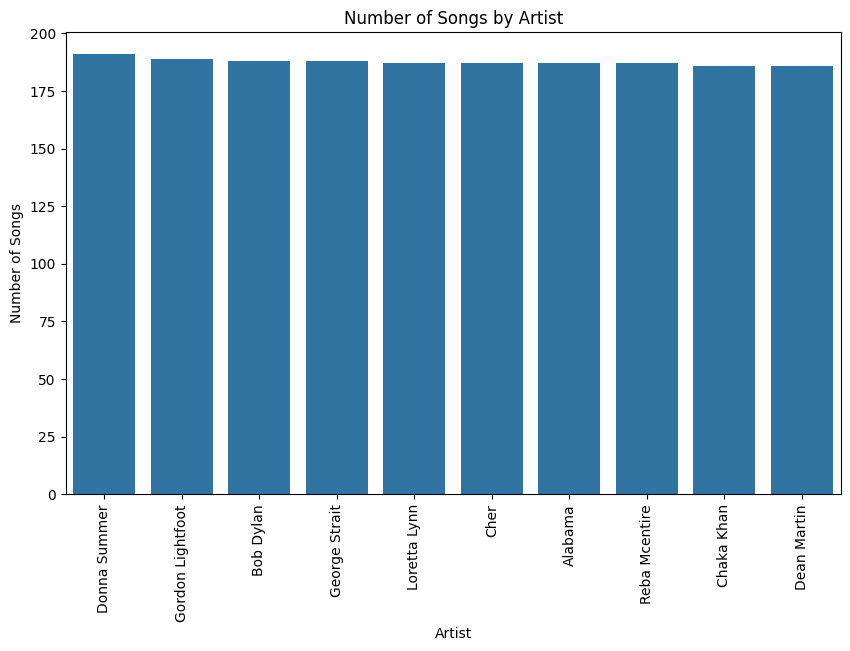

In [14]:
artist_counts = df['artist'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=artist_counts.index, y=artist_counts.values)
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Artist')
plt.xticks(rotation=90)
plt.show()

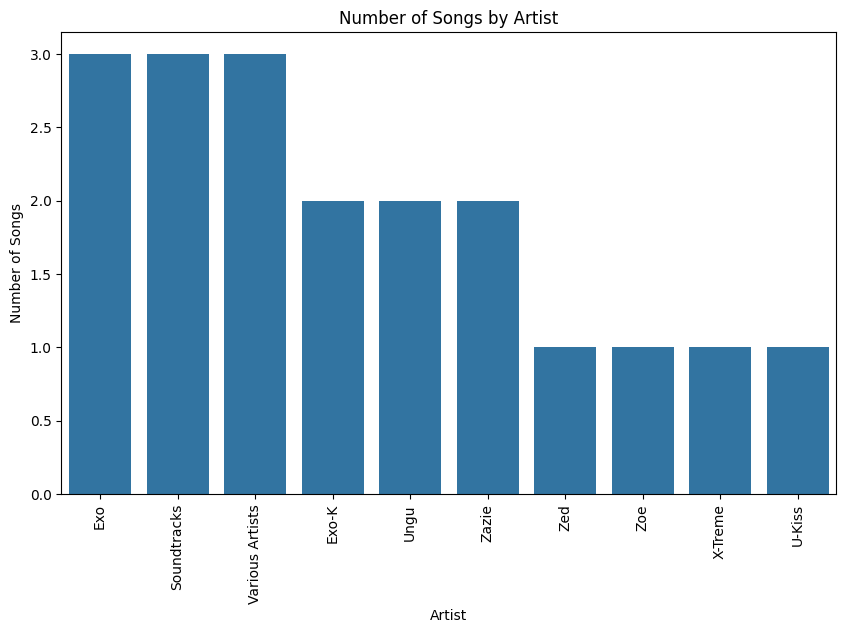

In [15]:
artist_counts = df['artist'].value_counts().tail(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=artist_counts.index, y=artist_counts.values)
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Artist')
plt.xticks(rotation=90)
plt.show()

Cleaning

In [16]:
brief_cleaning= (re.sub("[^A-Za-z']+", ' ',str(row)).lower() for row in df['lyrics'])
df_tmp=pd.DataFrame({'clean':brief_cleaning})
df['lyrics']=df_tmp['clean']
df['lyrics'] = df['lyrics'].str.replace(r'[^\w\s]+', '')
df['lyrics'] = df['lyrics'].str.replace('chorus', ' ', regex=False)
df['lyrics'] = df['lyrics'].str.replace('verse', '', regex=True)
df['lyrics'] = df['lyrics'].str.replace('intro', '', regex=True)
df['lyrics'] = df['lyrics'].str.replace('original', '', regex=True)
df['lyrics'] = df['lyrics'].str.replace('outro', '', regex=True)
df['lyrics'] = df['lyrics'].astype(str)
df['lyrics'] = df['lyrics'].str.replace(r'[^a-zA-Z\s]+', '', regex=True)
df['lyrics'] = [i.lower().replace("\n", "") for i in df['lyrics']]
df['artist']=[i.lower().replace("\n","") for i in df['artist']]
df.head()

<ipython-input-16-b5608e266494>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['lyrics'] = df['lyrics'].str.replace(r'[^\w\s]+', '')


,artist,lyrics
0,abba,look at her face its a wonderful face and it m...
1,abba,take it easy with me please touch me gently li...
2,abba,ill never know why i had to go why i had to pu...
3,abba,making somebody happy is a question of give an...
4,abba,making somebody happy is a question of give an...


Tf-idf

In [17]:
tmp=df[["artist","lyrics"]]


In [18]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import CountVectorizer


# tfidf_vectorizer = TfidfVectorizer()
# tfidf_matrix = tfidf_vectorizer.fit_transform(tmp['lyrics'])
# count_vectorizer = CountVectorizer()
# count_matrix = count_vectorizer.fit_transform(tmp['lyrics'])

# def wordList_removeStopWords(artist_text):
#     stop = stopwords.words('english') + ['\n']
#     wordList = []
#     for word in word_tokenize(artist_text.lower().strip()):
#         if not word in stop:
#             wordList= ' '.join([word])
#     return wordList


# artist_most_frequent_words = {}
# for artist, group in tmp.groupby('artist'):
#     artist_text = ' '.join(group['lyrics'])

#     words_without_stopwords = wordList_removeStopWords(artist_text)

#     artist_tfidf_matrix = tfidf_vectorizer.transform([words_without_stopwords])
#     max_tfidf_index = artist_tfidf_matrix.argmax()
#     #most_frequent_word = tfidf_vectorizer.get_feature_names()[max_tfidf_index]
#     most_frequent_word = count_vectorizer.get_feature_names_out()[max_tfidf_index]
#     artist_most_frequent_words[artist] = most_frequent_word
# artist_most_frequent_words

In [19]:
# import itertools

# newDict = dict(itertools.islice(artist_most_frequent_words.items(), 10))
# plt.figure(figsize=(10, 6))
# plt.bar(newDict.keys(), newDict.values())
# plt.xlabel('Artist')
# plt.title('Most Common Word for Each Artist')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

In [20]:


# artist_most_frequent_words["'n Sync"]


In [21]:
# artist_tfidf_most_frequent_word = {}
# for artist, word in artist_most_frequent_words.items():
#     word_index = tfidf_vectorizer.vocabulary_[word]
#     artist_index = tmp[tmp['artist'] == artist].index[0]
#     tfidf_score = tfidf_matrix[artist_index, word_index]
#     artist_tfidf_most_frequent_word[artist] = tfidf_score



Sampling

In [22]:
df=df.sort_values(by='artist')
first_100_artists=df['artist'].unique()[:10]
df=df[df['artist'].isin(first_100_artists)]
df

,artist,lyrics
13347,'n sync,girl dont say that its over cause you are a pa...
44696,'n sync,would you be my girlfriend repeat x i like you...
44695,'n sync,gotta giddy up yeah n sync giddy up gotta gid...
44694,'n sync,forever young forever young forever young fore...
44693,'n sync,you know that i love you in every way you brin...
...,...,...
451,alan parsons project,stealing a moment from mr time he rocks in his...
452,alan parsons project,bairnson we say welcome to the mission show u...
453,alan parsons project,maybe im imagining the things they say about m...
454,alan parsons project,stuart elliot vocal ask yourself a question no...


In [23]:
# prompt: seperate the lyrics into 2 halves in 2 columns

df['lyrics_first_half'] = df['lyrics'].apply(lambda x: x[:len(x)//2])
df['lyrics_second_half'] = df['lyrics'].apply(lambda x: x[len(x)//2:])
df.head()


,artist,lyrics,lyrics_first_half,lyrics_second_half
13347,'n sync,girl dont say that its over cause you are a pa...,girl dont say that its over cause you are a pa...,we used to know we used to know our love oh al...
44696,'n sync,would you be my girlfriend repeat x i like you...,would you be my girlfriend repeat x i like you...,n and hide you dont know cause things aint cle...
44695,'n sync,gotta giddy up yeah n sync giddy up gotta gid...,gotta giddy up yeah n sync giddy up gotta gid...,ow youve gone and done all this to me babe to ...
44694,'n sync,forever young forever young forever young fore...,forever young forever young forever young fore...,ing well our immortal voice will ring forever ...
44693,'n sync,you know that i love you in every way you brin...,you know that i love you in every way you brin...,eternity youve touched my heart with undying ...


In [24]:
df['artist_lyrics'] = df.apply(lambda row:  '<s> ' + row['artist'] + ' ' +'< --:::>' + ' ' +' '.join(row['lyrics_first_half'].split()) + '</s>' , axis=1)


In [25]:
df['lyrics_second_half'] = df.apply(lambda row:  '<s> '  +row['lyrics_second_half'] + '</s>' , axis=1)

In [26]:

df.head()
#df['artist_first_word'] = df['artist'] + ' ' + df['lyrics'].str.split().str.get()
#df.head()

,artist,lyrics,lyrics_first_half,lyrics_second_half,artist_lyrics
13347,'n sync,girl dont say that its over cause you are a pa...,girl dont say that its over cause you are a pa...,<s> we used to know we used to know our love o...,<s> 'n sync < --:::> girl dont say that its ov...
44696,'n sync,would you be my girlfriend repeat x i like you...,would you be my girlfriend repeat x i like you...,<s> n and hide you dont know cause things aint...,<s> 'n sync < --:::> would you be my girlfrien...
44695,'n sync,gotta giddy up yeah n sync giddy up gotta gid...,gotta giddy up yeah n sync giddy up gotta gid...,<s> ow youve gone and done all this to me babe...,<s> 'n sync < --:::> gotta giddy up yeah n syn...
44694,'n sync,forever young forever young forever young fore...,forever young forever young forever young fore...,<s> ing well our immortal voice will ring fore...,<s> 'n sync < --:::> forever young forever you...
44693,'n sync,you know that i love you in every way you brin...,you know that i love you in every way you brin...,<s> eternity youve touched my heart with undy...,<s> 'n sync < --:::> you know that i love you ...


In [27]:
df['artist_lyrics'].get(0)

'<s> abba < --:::> look at her face its a wonderful face and it means something special to me look at the way that she smiles when she sees me how lucky can one fellow be shes just my kind of girl she makes me feel fine who could ever believe that she could be mine shes just my kind of girl without her im blue and if she ever leaves me what could i do what could i do</s>'

In [28]:
df['lyrics'].get(0)

'look at her face its a wonderful face and it means something special to me look at the way that she smiles when she sees me how lucky can one fellow be shes just my kind of girl she makes me feel fine who could ever believe that she could be mine shes just my kind of girl without her im blue and if she ever leaves me what could i do what could i do and when we go for a walk in the park and she holds me and squeezes my hand well go on walking for hours and talking about all the things that we plan shes just my kind of girl she makes me feel fine who could ever believe that she could be mine shes just my kind of girl without her im blue and if she ever leaves me what could i do what could i do '

In [29]:
df['lyrics_second_half'].get(0)

'<s>  and when we go for a walk in the park and she holds me and squeezes my hand well go on walking for hours and talking about all the things that we plan shes just my kind of girl she makes me feel fine who could ever believe that she could be mine shes just my kind of girl without her im blue and if she ever leaves me what could i do what could i do </s>'

In [30]:
df= df.drop(['lyrics_first_half'], axis=1)

In [31]:
df['song_Length'] = df['lyrics'].str.len()
df['artist_lyrics_len'] = df['artist_lyrics'].str.len()
df.head()

,artist,lyrics,lyrics_second_half,artist_lyrics,song_Length,artist_lyrics_len
13347,'n sync,girl dont say that its over cause you are a pa...,<s> we used to know we used to know our love o...,<s> 'n sync < --:::> girl dont say that its ov...,1849,948
44696,'n sync,would you be my girlfriend repeat x i like you...,<s> n and hide you dont know cause things aint...,<s> 'n sync < --:::> would you be my girlfrien...,1801,925
44695,'n sync,gotta giddy up yeah n sync giddy up gotta gid...,<s> ow youve gone and done all this to me babe...,<s> 'n sync < --:::> gotta giddy up yeah n syn...,1414,729
44694,'n sync,forever young forever young forever young fore...,<s> ing well our immortal voice will ring fore...,<s> 'n sync < --:::> forever young forever you...,1453,751
44693,'n sync,you know that i love you in every way you brin...,<s> eternity youve touched my heart with undy...,<s> 'n sync < --:::> you know that i love you ...,1104,575


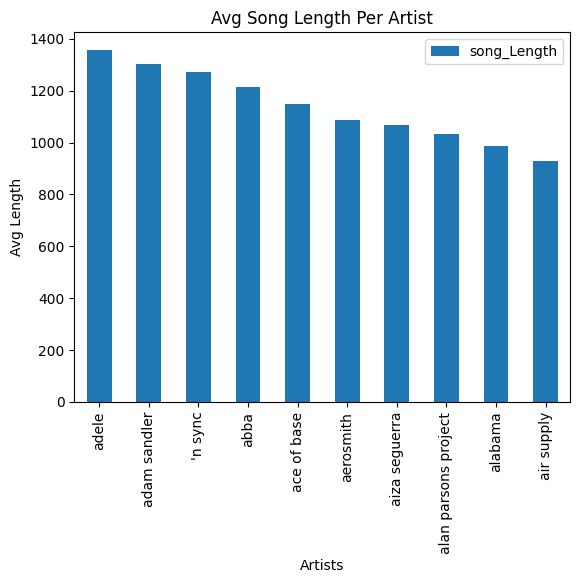

In [32]:
grouped= df.groupby(['artist'])['song_Length'].mean().reset_index().head(10)
grouped=grouped.sort_values('song_Length',ascending=False)
grouped.plot.bar(x="artist", y="song_Length",title='Avg Song Length Per Artist', ylabel='Avg Length',
         xlabel='Artists',)
plt.show()

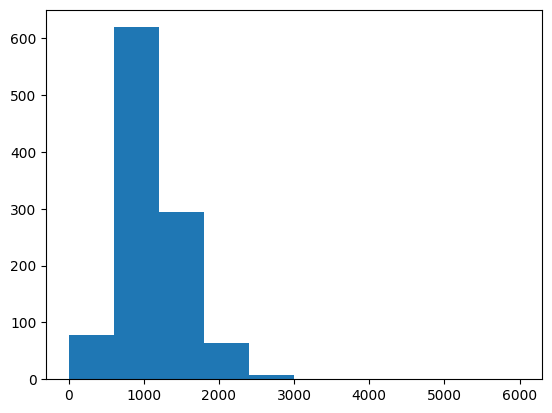

In [33]:
plt.hist(df['song_Length'].values,range=(0,6000))
plt.show()

In [34]:
df['song_Length'].max()

2909

In [35]:
df= df.drop(['artist'], axis=1)
df.head()

,lyrics,lyrics_second_half,artist_lyrics,song_Length,artist_lyrics_len
13347,girl dont say that its over cause you are a pa...,<s> we used to know we used to know our love o...,<s> 'n sync < --:::> girl dont say that its ov...,1849,948
44696,would you be my girlfriend repeat x i like you...,<s> n and hide you dont know cause things aint...,<s> 'n sync < --:::> would you be my girlfrien...,1801,925
44695,gotta giddy up yeah n sync giddy up gotta gid...,<s> ow youve gone and done all this to me babe...,<s> 'n sync < --:::> gotta giddy up yeah n syn...,1414,729
44694,forever young forever young forever young fore...,<s> ing well our immortal voice will ring fore...,<s> 'n sync < --:::> forever young forever you...,1453,751
44693,you know that i love you in every way you brin...,<s> eternity youve touched my heart with undy...,<s> 'n sync < --:::> you know that i love you ...,1104,575


In [36]:
df= df.drop(['lyrics'], axis=1)

In [37]:
df.shape

(1063, 4)

In [38]:
df[df['song_Length'] >1500].count()

lyrics_second_half    165
artist_lyrics         165
song_Length           165
artist_lyrics_len     165
dtype: int64

In [39]:
df=df[df['song_Length']<=1500]

In [40]:
df['artist_lyrics_len'].max()

778

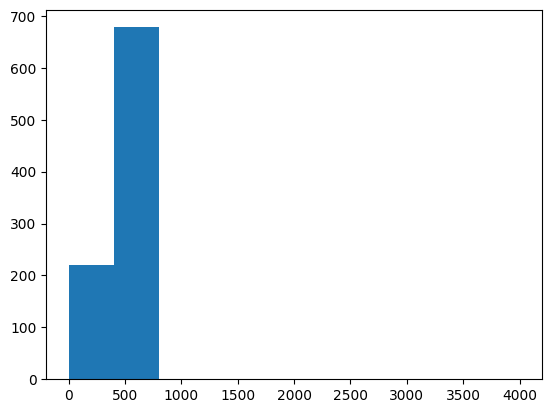

In [41]:
plt.hist(df['artist_lyrics_len'].values,range=(0,4000))
plt.show()

In [42]:
df['artist_lyrics_len'].count()

898

In [43]:
len(df['lyrics_second_half'].max())

333

In [44]:
len(df['artist_lyrics'].max())

717

In [45]:
df.shape

(898, 4)

Splitting data

In [46]:
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df,test_size=0.2,random_state=42)

In [47]:
X_train = train_df['artist_lyrics']
Y_train = train_df['lyrics_second_half']
X_test = test_df['artist_lyrics']
Y_test = test_df['lyrics_second_half']

In [48]:
X_train.shape

(718,)

In [49]:
Y_train.shape

(718,)

Model

## Bert Generation

In [50]:
from transformers import AutoTokenizer, BertGenerationEncoder,BertGenerationDecoder,EncoderDecoderModel, BertTokenizer
import torch

In [51]:
# leverage checkpoints for Bert2Bert model...
# use BERT's cls token as BOS token and sep token as EOS token
encoder = BertGenerationEncoder.from_pretrained("google-bert/bert-base-uncased")
# add cross attention layers and use BERT's cls token as BOS token and sep token as EOS token
decoder = BertGenerationDecoder.from_pretrained(
    "google-bert/bert-base-uncased", add_cross_attention=True, is_decoder=True
)
bert2bert = EncoderDecoderModel(encoder=encoder, decoder=decoder)

# create tokenizer...
tokenizer = BertTokenizer.from_pretrained("google-bert/bert-base-uncased")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

You are using a model of type bert to instantiate a model of type bert-generation. This is not supported for all configurations of models and can yield errors.


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

You are using a model of type bert to instantiate a model of type bert-generation. This is not supported for all configurations of models and can yield errors.
Some weights of BertGenerationDecoder were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['bert.encoder.layer.0.crossattention.output.LayerNorm.bias', 'bert.encoder.layer.0.crossattention.output.LayerNorm.weight', 'bert.encoder.layer.0.crossattention.output.dense.bias', 'bert.encoder.layer.0.crossattention.output.dense.weight', 'bert.encoder.layer.0.crossattention.self.key.bias', 'bert.encoder.layer.0.crossattention.self.key.weight', 'bert.encoder.layer.0.crossattention.self.query.bias', 'bert.encoder.layer.0.crossattention.self.query.weight', 'bert.encoder.layer.0.crossattention.self.value.bias', 'bert.encoder.layer.0.crossattention.self.value.weight', 'bert.encoder.layer.1.crossattention.output.LayerNorm.bias', 'bert.encoder.layer.1.crossattention.output.LayerNorm.weight'

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [52]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:

input_ids = tokenizer(
    X_train.tolist(), add_special_tokens=False, return_tensors="pt", padding=True , truncation=True).input_ids
labels = tokenizer(Y_train.tolist(), return_tensors="pt",padding=True , truncation=True).input_ids

# Convert input_ids and labels to PyTorch tensors
input_ids = torch.tensor(input_ids)
labels = torch.tensor(labels)

# Create a TensorDataset
dataset = TensorDataset(input_ids, labels)

batch_size = 4
epochs = 10

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer and loss function
optimizer = torch.optim.Adam(bert2bert.parameters(), lr=3e-5)
loss_function = torch.nn.CrossEntropyLoss()

# Train the model in batches
for epoch in range(epochs):
    count=0
    for batch_input_ids, batch_labels in dataloader:
        # Forward pass
        outputs = bert2bert(input_ids=batch_input_ids, decoder_input_ids=batch_labels, labels=batch_labels)
        loss = outputs.loss

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count+=1

        print(f"Epoch {epoch + 1}, Batch {count }, Loss: {loss.item()}")



<ipython-input-53-a87a34b40635>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(input_ids)
<ipython-input-53-a87a34b40635>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
/usr/local/lib/python3.10/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:643: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than 

Epoch 1, Batch 1, Loss: 9.263022422790527
Epoch 1, Batch 2, Loss: 8.2908296585083
Epoch 1, Batch 3, Loss: 7.975741863250732
Epoch 1, Batch 4, Loss: 7.591529369354248
Epoch 1, Batch 5, Loss: 7.059372425079346
Epoch 1, Batch 6, Loss: 6.6471848487854
Epoch 1, Batch 7, Loss: 6.578450679779053
Epoch 1, Batch 8, Loss: 6.197966575622559
Epoch 1, Batch 9, Loss: 5.870575904846191
Epoch 1, Batch 10, Loss: 5.535762310028076
Epoch 1, Batch 11, Loss: 5.493948459625244
Epoch 1, Batch 12, Loss: 4.909327507019043
Epoch 1, Batch 13, Loss: 4.989034652709961
Epoch 1, Batch 14, Loss: 4.48748254776001
Epoch 1, Batch 15, Loss: 4.366782188415527
Epoch 1, Batch 16, Loss: 4.606963634490967
Epoch 1, Batch 17, Loss: 4.8592000007629395
Epoch 1, Batch 18, Loss: 3.7948787212371826
Epoch 1, Batch 19, Loss: 4.171889781951904
Epoch 1, Batch 20, Loss: 4.443317413330078
Epoch 1, Batch 21, Loss: 4.142030239105225
Epoch 1, Batch 22, Loss: 4.4186859130859375
Epoch 1, Batch 23, Loss: 3.293447732925415
Epoch 1, Batch 24, Los

In [52]:
X_test

13386    'n sync [SEP] the game is over ah yeah ah yeah...
13375    'n sync [SEP] whats the riddle of it all whats...
44695    'n sync [SEP] gotta giddy up yeah n sync giddy...
13349    'n sync [SEP] eat eat eat all day long eat eat...
44687    'n sync [SEP] could it be you ive been searchi...
13376    'n sync [SEP] well its not far down to paradis...
44719    'n sync [SEP] when you wish upon a star makes ...
44677    'n sync [SEP] i was just doin my thing hanging...
13380    'n sync [SEP] clouds above you start to pour a...
13368    'n sync [SEP] oh its christmas oh ah im so gla...
13363    'n sync [SEP] if im not the one you want take ...
44681    'n sync [SEP] oh you can be what you wanna be ...
13354    'n sync [SEP] here we go here we go one more t...
Name: artist_lyrics, dtype: object

In [ ]:

# Generate text using the model
input_text = X_test[13386]
input_ids = tokenizer(input_text, return_tensors="pt").input_ids
outputs = bert2bert.generate(input_ids)
output_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(output_text)

In [ ]:
input_ids = tokenizer(
    X_test.tolist(), add_special_tokens=False, return_tensors="pt", padding=True , truncation=True).input_ids
labels = tokenizer(Y_test.tolist(), return_tensors="pt",padding=True , truncation=True).input_ids

# Convert input_ids and labels to PyTorch tensors
input_ids = torch.tensor(input_ids)
labels = torch.tensor(labels)

# Create a TensorDataset
dataset = TensorDataset(input_ids, labels)

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
lossArray = []
for batch_input_ids, batch_labels in dataloader:
    # Forward pass
    outputs = bert2bert(input_ids=batch_input_ids, decoder_input_ids=batch_labels, labels=batch_labels)
    loss = outputs.loss
    print(f"Loss: {loss.item()}")
    lossArray.append(loss.item())


mean_loss = np.mean(lossArray)
print(f"Mean Loss: {mean_loss}")
